### ARMA-Autoregressive Moving Average (ARMA)


In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
plt.style.use('ggplot')
plt.style.available
%matplotlib inline

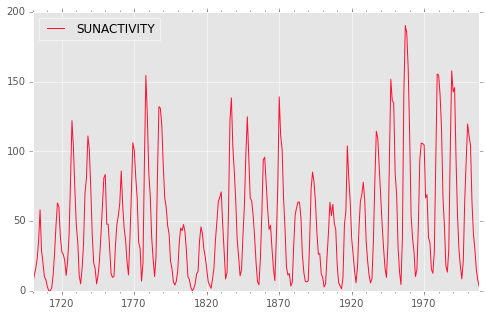

In [5]:
# load dataset
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
del dta['YEAR']
dta.plot(figsize=(8,5),color='#ff1133')

## ARMA模型
### I. 平稳性
- 严平稳（strictly stationary）
    - 对所有的t，任意正整数k和任意k个正整数$(t_1,t_2,\cdots,t_k)$ ===> $(r_{t_1},r_{t_2},\cdots,r_{t_k})$的联合分布是相同的。换言之，严平稳要求联合分布在时间的平移变换下保持不变。
- 弱平稳（weakly stationary）：以下若非特别说明，均假设序列处于弱平稳假设下。
    - $r_t$的均值$E(r_t)$，以及$r_t$和$r_{t-l}$的协方差$Cov(r_t,r_{t-l})=\gamma_l$不随时间改变（其中l为任意整数）
    - 相对于严平稳的**分布时间平移不变性**，弱平稳只要求**矩的时间平移不变性**。
- 间隔为$l$的自协方差$\gamma_l$的性质。
    - $\gamma_l = Var(t_l)$
    - $\gamma_l = Cov(r_t,r_{t-l}) = Cov(r_{t-l},r_t) = \gamma_{-l}$

### II. 自相关系数ACF和偏自相关系数PACF
##### <font color='#ff1111' size=2 face="微软雅黑"> 自相关系数</font>
- 间隔为$l$的**ACF自相关系数$\rho_l$**
$$\rho_l=\frac{Cov(r_t,r_{t-l})}{\sqrt{Var(r_t)Var(r_{t-l})}}=\frac{Cov(r_t,r_{t-l})}{Var(r_t)}=\frac{\gamma_l}{\gamma_0}$$
一般的，收益率序列$r_t$的间隔$l$的样本自相关系数定义为:
$$\rho_l=\frac{\sum_{t=l+1}^{T}{(r_t-\bar{r})(r_{t-l}-\bar{r})}}{\sum_{t=1}^{T}{(r_t-\bar{r})^2}}$$
    - 当且仅当对所有的$l$都有$\rho_l=0$时，弱平稳序列不相关。
- **Bartlett公式**: 若$r_t$是一个弱平稳序列，满足$r_t = \mu + \sum_{i=0}^{q}{\psi_ia_{t-i}}$，其中$\psi_0=1$，$\{a_i\}$是均值为0的独立同分布任意变量的序列，则对$l>q$，$\hat{\rho}_l$渐进的服从均值为0，方差为$(1+2\sum_{i=1}^{q}{\rho_i^2})/T$的正态分布。
- Ljung-Box检验：检验$r_t$的几个自相关系数是否同时为0
    - Q统计量: $Q(m)=T(T+2)\sum_{l=1}^m{\frac{\hat{\rho}_l^2}{T-l}}$，其渐进的服从自由度为m的$\chi^2$分布
    - null hypothesis $H_0$: $\rho_0=\rho_1=\cdots=\rho_m=0$
    - 当$p$值小于等于显著水平$\alpha$时拒绝$H_0$
    - m的选取会影响$Q(m)$的表现，通常$m\approx{ln(T)}$会有较好的功效。
    - <font color=#ff2277 size=2 face="微软雅黑">零自相关系数的检验被用来作为有效市场假定是否成立的判定工具</font>
    
##### <font color='#ff1111' size=2 face="微软雅黑"> PACF偏自相关系数【见模型定阶部分】</font>

###III. 白噪声和线性时间序列

- 白噪声
    - 如果$\{r_t\}$是一个具有<font color=#ff2277 size=2 face="微软雅黑">有限均值</font>和<font color=#ff2277 size=2 face="微软雅黑">有限方差</font>的<font color=#ff2277 size=2 face="微软雅黑">独立同分布</font>随机变量序列，则其称为一个白噪声序列。特别的若$r_t$还服从均值为$0$、方差为$\sigma^2$的正态分布，则称其为高斯白噪声。
    - 白噪声$\Longleftrightarrow$<font color=#ff2277 size=2 face="微软雅黑">所有</font>自相关函数为0
- 线性时间序列
$$r_t = \mu + \sum_{i=0}^{q}{\psi_ia_{t-i}}$$
    - 若时间序列$\{r_t\}$可以写成上式形式，则称其为线性时间序列。其中$\mu$是$r_t$的均值，$\psi_0=1$，$\{a_t\}$是零均值独立同分布的随机变量序列（白噪声，通常称其为时刻$t$的新息innovation或扰动shock，表示t时刻出现的新的信息）。系数$\psi_i$决定了$r_t$的**$\psi-权重$**
    - <font color=#ff2277 size=2 face="微软雅黑">线性时间序列是用来描述$r_t$的**$\psi$-权重**的计量经济模型和统计模型</font>
    - 线性时间序列的矩
        - $E(r_t)=\mu$
        - $Var(r_t)=\sigma_a^2\sum_{i=0}^{\infty}\psi_i^2$
        - $\gamma_l=Cov(r_t,r_{t-l})=\sigma_a^2\sum_{j=0}^{\infty}\psi_j\psi_{j+l}$
        - $\rho_l=\frac{\gamma_l}{\gamma_0}=\frac{\sum_{i=0}^{\infty}{\psi_j\psi_{j+l}}}{1+\sum_{i=0}^{\infty}{\psi_i^2}}$，其中$l>0$
        
### IV. AR自回归模型
$$AR(p)模型: r_t = \phi_0 + \sum_{i=1}^{p}{\phi_ir_{t-i}}+a_t$$
##### AR模型的ACF: 
$$(1-\sum_{i=1}^p{\phi_i{B^i}})\rho_l=0,其中l>0,B为向后推移因子,B\rho_l=\rho_{l-1}$$
特征方程$1-\sum_{i=1}^p{\phi_ix^i}=0$的根$x_i$的倒数称为$AR(p)$模型的特征根，用$\omega_i$表示，ACF差分方程可以分解为$\prod_{i=1}^p(1-\omega_iB)=0$的形式。若特征根为复数，则会导致商业环的出现。<font color=#ff2277 size=2 face="微软雅黑">序列平稳性要求所有特征根$\omega_i$的模都小于1</font>

##### AR模型的定阶
- **PACF偏自相关函数**
    - 定义
    
    $$r_t = \phi_{0,1} + \phi_{1,1}r_{t-1} + e_{1t}$$
    $$r_t = \phi_{0,2} + \phi_{1,2}r_{t-1} + \phi_{2,2}r_{t-2} + e_{2t}$$
    $$r_t = \phi_{0,3} + \phi_{1,3}r_{t-1} + \phi_{2,3} + \phi_{3,3}r_{t-3} + e_{3t}$$
    $$r_t = \phi_{0,4} + \phi_{1,4}r_{t-1} + \phi_{2,4} + \phi_{3,3}r_{t-3} + \phi_{4,4}r_{t-4} + e_{4t}$$
    $\phi_{i,i}$的估计$\hat{\phi}_{i,i}$称为间隔为$i$的样本偏自相关函数，其表示<font color='#ff1111'>在AR(i-1)模型上添加的$r_{t-i}$对$r_t$的贡献。</font>因此，对一个AR(p)模型，间隔为$p$的样本偏自相关函数不应为0，而<font color='ff1111'>对所有$j>p$，$\hat{\phi}_{j,j}$应该接近与0。$\Longleftrightarrow$AR(p)模型是$p$步截尾的。</font>
    - <font color='ff1111'>平稳高斯AR(p)模型</font>的PACF的性质
        - 当样本$T$趋于$+\infty$时，$\hat{\phi}_{p,p}$收敛于$\phi_p$
        - 对$l>p$，$\phi_{l,l}$收敛于0
        - 对$l>p$，$\phi_{l,l}$的渐进方差为$\frac{1}{T}$
        
- **信息准则Information Criterion: 评价模型【《金融事件序列分析》page42】**

    其中$L$是似然函数，$n$是数据量，$k$是模型的变量个数。准则的前一项度量拟合优度，后一项为惩罚想（奥卡姆剃刀）。准则准则值越小越好
    - 赤池准则AIC: 
        - $AIC = -ln(L) + 2k        
        - statsmodels.tsa.arima_model.aic属性
    - 贝叶斯准则BIC: 
        - $BIC = -ln(L) + ln(n)*k$
        - statsmodels.tsa.arima_model.bic属性

    - hannan-quinn准则:
        - $HQIC = -2ln(L) + ln(ln(n))*k$
        - statsmodels.tsa.arima_model.hqic属性
- 模型的检验    
    - 如果模型时充分的，则其残差序列应是白噪声
    - 残差的样本自相关函数和Ljung-Box统计量（$Q(m)$渐进服从自由度为$m-g$的$\chi^2$分布，其中$g$是AR系数的个数）可以用来检验$\hat{a}_t$与一个白噪声的接近程度。

##### 拟合优度
- $R^2$统计量
$$R^2 = 1 - \frac{残差的平方和}{总的平方和} = 1 - \frac{\sum_{t=p+1}^{T}{\hat{a}_t^2}}{\sum_{t=p+1}^T{(r_t-\hat{r})^2}}$$
- 调整后$R^2$统计量
$$Adj-R^2 = 1 - \frac{残差的方差}{r_t的方差} = 1 - \frac{\hat{\sigma}_a^2}{\hat{\sigma}_r^2}$$

##### AR模型的预测
- 向前$l$步预测
$$\hat{r}_h(l) = \phi_0 + \sum_{i=1}^p\phi_i\hat{r}_h(l-i)$$
    其中，当$k\le{0}$时，$\hat{r}_h(k)=r_{h+k}$为已知历史值，当$k>{0}$时，$\hat{r}_h(k)$可以递推求得。
- 均值回转（mean reversion）
    - 长期的点预测趋于无条件均值
    - 半衰期（half-life）
    
### V. MA滑动平均模型
- 对无穷阶AR模型的系数$\phi_i$做某种限制，使它们可以由有限多个参数确定。
- MA(1):假定$\phi_i = -\theta_1^i$，则可以推出$r_t = c_0 + a_t + \theta_1a_{t-1} = c_0 + (1-\theta_1B)a_t$，其中$c_0$是一个常数
- MA(q):$r_t = c_0 + a_t - \sum_{i=1}^q{\theta_i{a_{t-i}}} = c_0 + (1-\sum_{i=1}^q{\theta_i{B^q}})a_t$，其中$q>0$。

##### MA模型的性质
- 平稳性
    - <font color='#ff1111'>MA模型总是平稳的</font>
- 自相关函数
    - 对MA(q)模型，其ACF在间隔为$q$时不为0，但对$l>q$，$\rho_l=0$。因此，<font color='#ff1111'>MA(q)序列只与其前q个延迟值线性相关，从而它是一个“有限记忆模型”。</font>
- 可逆性
    - 当$|\theta_1|<1$时，MA(1)模型时可逆的【《金融时间序列分析》page 52】

##### MA模型的定阶
- <font color='#ff1111'>MA(q)模型的ACF是q步截尾的。</font>

##### MA模型的参数估计
- 条件似然法
- 精确似然法

##### MA模型的预测
- 对于一个MA(q)模型，向前$q$步以后的预测就达到模型的均值。

#### <font color='#ff1199' size=3 face='微软雅黑'>AR与MA模型小结</font>
| **模型**       | **ACF**    |**PACF**      |**平稳条件**  |
| :---------------:|:-------------:|:-------------:|:-------------:|
| **AR**        | 拖尾        | p步截尾      |特征根的模小于1|
| **MA**        | q步截尾     | 拖尾        |总是平稳     |
对一个平稳序列，向前多步预测收敛到序列的均值，当预测的范围增加时，预测误差的方差收敛于序列的方差。

### VII.简单的ARMA模型 


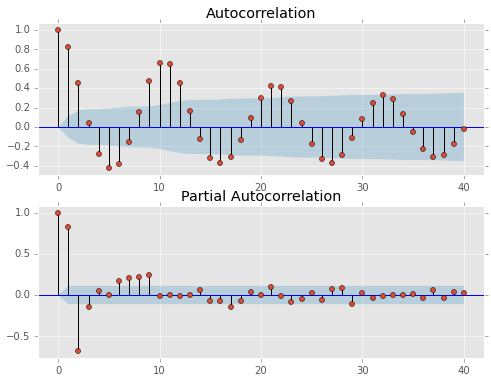

In [6]:
def plot_acf_pacf(data,lags=40):
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=lags,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(data,lags=lags,ax=ax2)
plot_acf_pacf(dta)

#### statsmodels中的ARMA模型
*sm.tsa.ARMA(self, endog, order, exog=None, dates=None, freq=None, missing='none')*
- 输入参数
    - endog: endogenous variable内生变量 | array-like
    - order: 模型阶数(AR,MA)<——>(p,q) | iterable
    - exog: exogenous variables外生变量，不可以包含常数或趋势，可以在fit方法中具体给出 |  array-like | optional
    $$如果包含外生变量，则拟合的模型为: \phi(L)(y_t - X_t\beta) = \theta(L)\epsilon_t$$
    - dates: array-like datetime。如果一个pandas object作为endog或exog传入，她被假设包含一个DateIndex | optional
    - freq: 时间序列的频率。可以是一个pandas object，或'B','D','W','M','A','Q'。| optional if dates are given.
- 方法列表

|方法名|简介|
|------|----|
|fit([start_params,trend,method,...]) |通过卡尔曼滤波使用精确似然函数拟合ARMA(p,q)模型|
|from_formula(formula,data[,subset])|从formula和dataframe生成模型|
|predict(params[,start,end,exog,dynamic])|使用拟合的ARMA模型进行样本内和样本外预测|
|geterrors(params)|获取ARMA process的误差|
|hessian(params)|计算给定params的Hessian矩阵|
|information(params|模型的Fisher Information matrix|
|initialize()|初始化（或重新初始化）一个模型实例|
|loglike(params[,set_sigma2])|计算模型的对数似然|
|loglike_css(params[,set_sigma2])|计算平方似然函数的条件和|
|loglike_kalman(params[,set_sigma2])|通过卡尔曼滤波计算模型的精确似然|
|score(params)|计算在params处的score function|


    
- <font color='#ff1199'>**fit()方法**</font>: *sm.tsa.ARMA.fit(self, start_params=None, trend='c', method='css-mle', transparams=True, solver='lbfgs', maxiter=50, full_output=1, disp=5, callback=None, **kwargs)*
    - 参数
        - start_params: ARMA(p,q)的其实参数，如果为None，取默认值。| array-like | optional
        - transparams: 是否变换参数保证平稳性。| bool | optional
        - method: 要最大化的对数似然函数。| str
            - css-mle: 似然平方的条件和被最大化，并且其值被作为初值通过Kalman filter计算
            - mle: 准确的似然函数通过Kalman filter最大化
            - css: 似然平方的条件和被最大化
        - trend: 是否包含常数 | str
            - c: 包含
            - nc: 不包含
        - solver: 求解器，略 | str or None | optional
        - maxiter: 最大迭代次数 | int | optional
        - tol: 收敛容差 | float
        - disp: 若为True，打印收敛信息 | bool | optional
        - callback: 略
    - 返回: statsmodels.tsa.arima_model.ARMA Results class

- <font color='#ff1199'>**predict()方法**</font>: *sm.tsa.ARMA.predict(params, start=None, end=None, exog=None, dynamic=False)*
    - 参数
        - params: 拟合的模型参数| array-like 
        - start: 预测的起始位置|int, str, or datetime
        - end: 预测的结束位置|int, str, or datetime
        - exog: 外生变量，如果模型为ARMAX且要求做样本外预测，则其必须给出。e.g. 如果拟合的是ARMAX(2,q)模型且要做5步预测，则需要7(=2+5)个观察值|array-like|optional
        - dynamic: 其影响样本内预测。如果dynamic为False，样本内的lagged value被用来做预测；否则使用样本内预测来代替lagged  dependent variables|bool|optional
    - 返回
        - 预测值|array
        
      
##### Durbin Watson Test: 检验序列自相关性
- 理论:
    - 零假设: 无序列相关性
    - DW统计量为$\sum_{t=2}^T((e_t - e_{t-1})^2)/\sum_{t=1}^Te_t^2$    
    - DW统计量约等于$2*(1-r)$，$r$为样本残差的自相关函数。r=0时表示没有序列相关性，DW=2；当DW越趋近于0时，正相关越明显；越趋近于4时，负相关越明显。
- sm.stats.durbin_watson(resids,axis=0)
    - 参数
        - resids: 残差序列 | array-like
    - 返回
        - dw统计量 | float,array-like

parameters of ARMA(2,0)        
const                49.659389
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
AIC: 2622.63633806
BIC: 2637.56970317
HQIC: 2628.60672591
parameters of ARMA(3,0)        
const                49.749953
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64
AIC: 2619.4036287
BIC: 2638.07033508
HQIC: 2626.8666135
Durbin Watson Test of arma_mod30: 1.95648081561
Normal Test of residual: (49.845020032909339, 1.5006915069024666e-11)


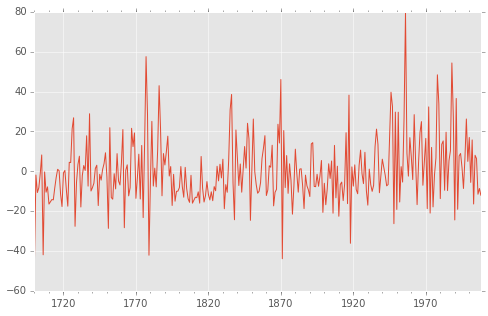

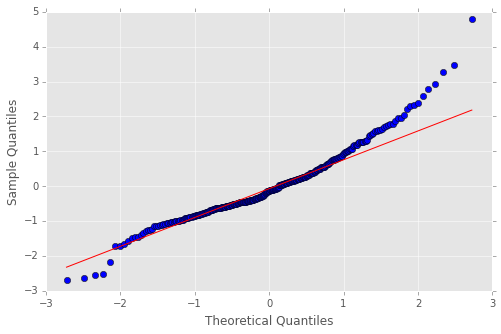

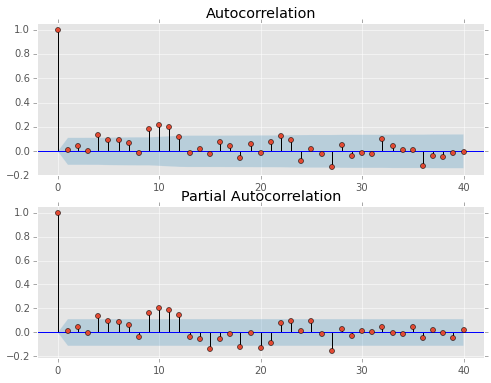

In [7]:
# sm.stats.durbin_watson?
arma_mod20 = sm.tsa.ARMA(dta,(2,0)).fit()
print('parameters of ARMA(2,0) \
       \n=======================')
def arma_model_info(arma_model):
    print(arma_model.params)
    print('AIC:',arma_model.aic)
    print('BIC:',arma_model.bic)
    print('HQIC:',arma_model.hqic)
arma_model_info(arma_mod20)

arma_mod30 = sm.tsa.ARMA(dta,(3,0)).fit()
print('parameters of ARMA(3,0) \
       \n=======================')
arma_model_info(arma_mod30)

# Durbin Watson Test
durbin_watson = sm.stats.durbin_watson(arma_mod30.resid.values)
print('Durbin Watson Test of arma_mod30:',durbin_watson)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

# 正态性检验
resid = arma_mod30.resid
normal_test = stats.normaltest(resid)
print('Normal Test of residual:',normal_test)
# p value is less than 5%, therefore null hypothsis of normality
# is rejected
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
# qqplot. line='q'==>a line is fit through quantiles
ax = qqplot(resid,line='q',ax=ax,fit=True)
# plot acf and pcf of residual 
plot_acf_pacf(resid)

*sm.tsa.acf(x, unbiased=False, nlags=40, qstat=False, fft=False, alpha=None)*

- 参数:
    - x: 时间序列数据 | array
    - unbiased: 是否无偏。若为True，autocovariance的分母是n-k，否则为n | bool
    - nlags: 返回自相关函数的滞后数 | int | optional
    - qstats: 若为True，返回每个自相关系数的Ljung-Box的q统计量。| bool | optional
    - fft: 若为True，通过快速傅里叶变换FFT计算ACF。| bool | optional
    - alpha: 若给定alpha，返回给定置信水平的置信区间。e.g. 若$\alpha = 0.5$, 返回$95%$置信区间，其中标准差通过Bartlett公式计算 | scalar | optional
- 返回
    - acf: 自相关函数。注: acf at lag 0 is returned| array
    - confint: ACF的置信区间。若confint不为None，返回该值。| array | optional
    - qstat: Ljung-Box Q-Statistics。若q_stat为True返回该值。| array | optional
    - pvalues: Q统计量相对应的p-value。若q_stat为True返回该值。| array | optional


In [17]:
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data = np.c_[range(1,41),r[1:],q,p]
table = pd.DataFrame(data,columns=['lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

           AC          Q      Prob(>Q)
lag                                   
1    0.009179   0.026286  8.712028e-01
2    0.041793   0.573042  7.508715e-01
3   -0.001335   0.573601  9.024483e-01
4    0.136089   6.408921  1.706203e-01
5    0.092468   9.111828  1.046860e-01
6    0.091948  11.793244  6.674345e-02
7    0.068748  13.297201  6.518982e-02
8   -0.015020  13.369229  9.976132e-02
9    0.187592  24.641909  3.393910e-03
10   0.213718  39.321995  2.229474e-05
11   0.201082  52.361139  2.344948e-07
12   0.117182  56.804191  8.574251e-08
13  -0.014055  56.868327  1.893901e-07
14   0.015398  56.945566  3.997655e-07
15  -0.024967  57.149321  7.741463e-07
16   0.080916  59.296772  6.872157e-07
17   0.041138  59.853741  1.110943e-06
18  -0.052021  60.747431  1.548430e-06
19   0.062496  62.041694  1.831641e-06
20  -0.010301  62.076981  3.381239e-06
21   0.074453  63.926656  3.193583e-06
22   0.124955  69.154773  8.978346e-07
23   0.093162  72.071037  5.799777e-07
24  -0.082152  74.346689 